In [1]:
import numpy as np, pandas as pd
import scipy.stats as stat
import sklearn as sk
#import pandas_profiling

from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels as sm
import statsmodels.formula.api as smf

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [33]:
house_info = pd.read_csv("C:/Users/tejan/Desktop/Data Analystics/class work/python stats class 12(linear regression)/2. Predicting House Prices/House_Prices.csv")

In [35]:
house_info.head()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East


In [51]:
house_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Home          128 non-null    int64 
 1   Price         128 non-null    int64 
 2   SqFt          128 non-null    int64 
 3   Bedrooms      128 non-null    int64 
 4   Bathrooms     128 non-null    int64 
 5   Offers        128 non-null    int64 
 6   Brick         128 non-null    object
 7   Neighborhood  128 non-null    object
dtypes: int64(6), object(2)
memory usage: 8.1+ KB


In [52]:
numeric_var_names = house_info.loc[ :,house_info.dtypes == 'int64']
cat_var_names = house_info.loc[ :,house_info.dtypes == 'object']

In [53]:
numeric_var_names.shape

(128, 6)

In [66]:
numeric_var_names.head()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers
0,1,114300,1790,2,2,2
1,2,114200,2030,4,2,3
2,3,114800,1740,3,2,1
3,4,94700,1980,3,2,3
4,5,119800,2130,3,3,3


In [67]:
cat_var_names.head()

,Brick,Neighborhood
0,No,East
1,No,East
2,No,East
3,No,East
4,No,East


In [56]:
def var_summary(x):
    return pd.Series([x.count(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.std()/x.mean(), x.min(),
                     x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),
                      x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),
                         x.max()],
                    index=['N', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'CV','MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])


In [68]:
 numeric_var_names.apply(var_summary).T

,N,SUM,MEAN,MEDIAN,STD,VAR,CV,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
Home,128.0,8256.0,64.500000,64.5,37.094474,1.376000e+03,0.575108,1.0,2.27,7.35,13.7,32.75,64.5,96.25,115.3,121.65,126.73,128.0
Price,128.0,16694700.0,130427.343750,125950.0,26868.770371,7.219308e+08,0.206006,69100.0,81570.00,91310.00,102020.0,111325.00,125950.0,148250.00,166560.0,179465.00,196476.00,211200.0
SqFt,128.0,256120.0,2000.937500,2000.0,211.572431,4.476289e+04,0.105737,1450.0,1530.80,1664.00,1720.0,1880.00,2000.0,2140.00,2250.0,2368.00,2505.70,2590.0
Bedrooms,128.0,387.0,3.023438,3.0,0.725951,5.270054e-01,0.240108,2.0,2.00,2.00,2.0,3.00,3.0,3.00,4.0,4.00,4.73,5.0
Bathrooms,128.0,313.0,2.445312,2.0,0.514492,2.647023e-01,0.210399,2.0,2.00,2.00,2.0,2.00,2.0,3.00,3.0,3.00,3.00,4.0
Offers,128.0,330.0,2.578125,3.0,1.069324,1.143455e+00,0.414768,1.0,1.00,1.00,1.0,2.00,3.0,3.00,4.0,4.00,5.00,6.0


In [69]:
def cat_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.value_counts()], 
                  index=['N', 'NMISS', 'ColumnsNames'])

cat_var_names.apply(cat_summary)


,Brick,Neighborhood
N,128,128
NMISS,0,0
ColumnsNames,"No 86 Yes 42 Name: Brick, dtype: int64",East 45 North 44 West 39 Name: Neig...


In [80]:
cat_var_names.head()

,Brick_Yes,Neighborhood_North,Neighborhood_West
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [73]:
numeric_var_names.isna().sum()
# as there is no missing so missing treatment is not required

Home         0
Price        0
SqFt         0
Bedrooms     0
Bathrooms    0
Offers       0
dtype: int64

In [74]:
# work on dummy variable 

In [75]:
# dummy function 
# An utility function to create dummy variable
def create_dummies( df, colname ):
    col_dummies = pd.get_dummies(df[colname], prefix=colname, drop_first=True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis = 1, inplace = True )
    return df

In [76]:
cat_var_names.columns

Index(['Brick', 'Neighborhood'], dtype='object')

In [77]:
for x in cat_var_names.columns:
    cat_var_names[x] = cat_var_names[x].astype('category')
    cat_var_names = create_dummies(cat_var_names, x)

<ipython-input-77-afc71a36581e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_var_names[x] = cat_var_names[x].astype('category')


In [79]:
cat_var_names.head()

,Brick_Yes,Neighborhood_North,Neighborhood_West
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [83]:
# now concating categorical and continues vriable 

house_info_new = pd.concat([numeric_var_names, cat_var_names], axis = 1)
house_info_new.head()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick_Yes,Neighborhood_North,Neighborhood_West
0,1,114300,1790,2,2,2,0,0,0
1,2,114200,2030,4,2,3,0,0,0
2,3,114800,1740,3,2,1,0,0,0
3,4,94700,1980,3,2,3,0,0,0
4,5,119800,2130,3,3,3,0,0,0


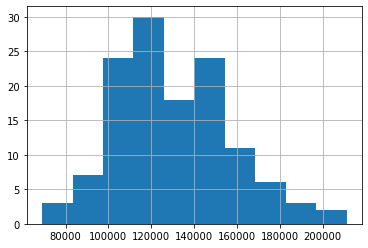

In [89]:
house_info_new.Price.hist()

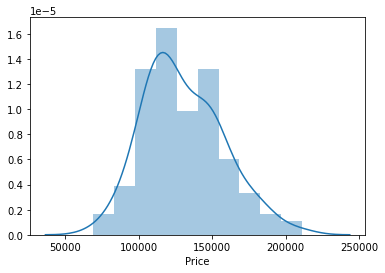

In [92]:
# exploring data
# Distribution of variables
sns.distplot(house_info_new.Price)

In [95]:
numeric_var_names.corr()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers
Home,1.000000,0.108190,0.168553,-0.068568,0.127694,-0.053597
Price,0.108190,1.000000,0.552982,0.525926,0.523258,-0.313636
SqFt,0.168553,0.552982,1.000000,0.483807,0.522745,0.336923
Bedrooms,-0.068568,0.525926,0.483807,1.000000,0.414556,0.114271
Bathrooms,0.127694,0.523258,0.522745,0.414556,1.000000,0.143793
Offers,-0.053597,-0.313636,0.336923,0.114271,0.143793,1.000000


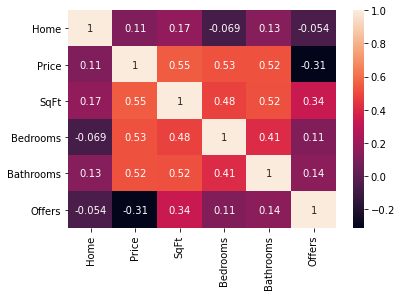

In [99]:
# sns.heatmap(numeric_var_names.corr())
sns.heatmap(numeric_var_names.corr(), annot = True)

In [98]:
sns.heatmap?

In [102]:
#Splitting the data

feature_columns = house_info_new.columns.difference( ['Price'] )
feature_columns

Index(['Bathrooms', 'Bedrooms', 'Brick_Yes', 'Home', 'Neighborhood_North',
       'Neighborhood_West', 'Offers', 'SqFt'],
      dtype='object')

In [111]:
train, test = train_test_split( house_info_new,test_size = 0.3,random_state = 12345 )

In [120]:
lm = smf.ols( "Price ~ Bathrooms+ Bedrooms+ Brick_Yes+ Neighborhood_West+ Offers+ SqFt", train ).fit()

In [121]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     86.17
Date:                Fri, 04 Dec 2020   Prob (F-statistic):           2.65e-33
Time:                        12:56:31   Log-Likelihood:                -944.01
No. Observations:                  89   AIC:                             1902.
Df Residuals:                      82   BIC:                             1919.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           305.7087   1.12e+0

In [125]:
train["pred_price"] = lm.predict(train)
test["pred_price"] = lm.predict(test)

<ipython-input-125-6eeb8383ed8b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["pred_price"] = lm.predict(train)
<ipython-input-125-6eeb8383ed8b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["pred_price"] = lm.predict(test)


In [124]:
train.head()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick_Yes,Neighborhood_North,Neighborhood_West,pred_price
51,52,91100,1860,2,2,3,0,1,0,99336.804117
118,119,150200,1950,3,2,3,1,1,0,127653.340513
63,64,120500,1910,2,3,2,0,0,0,116021.593487
111,112,114900,1740,2,2,2,0,1,0,100743.449617
54,55,81300,1650,3,2,3,0,1,0,92261.296125


In [126]:
test.head()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick_Yes,Neighborhood_North,Neighborhood_West,pred_price
121,122,105600,1930,3,3,3,0,0,0,113585.663806
93,94,157100,2080,3,3,2,0,0,0,129833.040474
99,100,171000,2080,3,3,2,1,0,1,169752.281067
94,95,160600,2150,4,3,3,1,0,1,170064.634935
97,98,126800,2000,2,2,1,1,0,0,141939.393184
